<a href="https://colab.research.google.com/github/siyeol/Natural-Language-Processing/blob/main/TheGuardian_TextMining_Presentation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Coaching for Python
# Week 6: Project Presentation

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "SYC"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Executive Summary

### Name

최시열

### Target Web Site

*TheGuardian*.com

https://www.theguardian.com/football/2020/may/10/premier-league-crunch-talks-no-help-boris-johnson

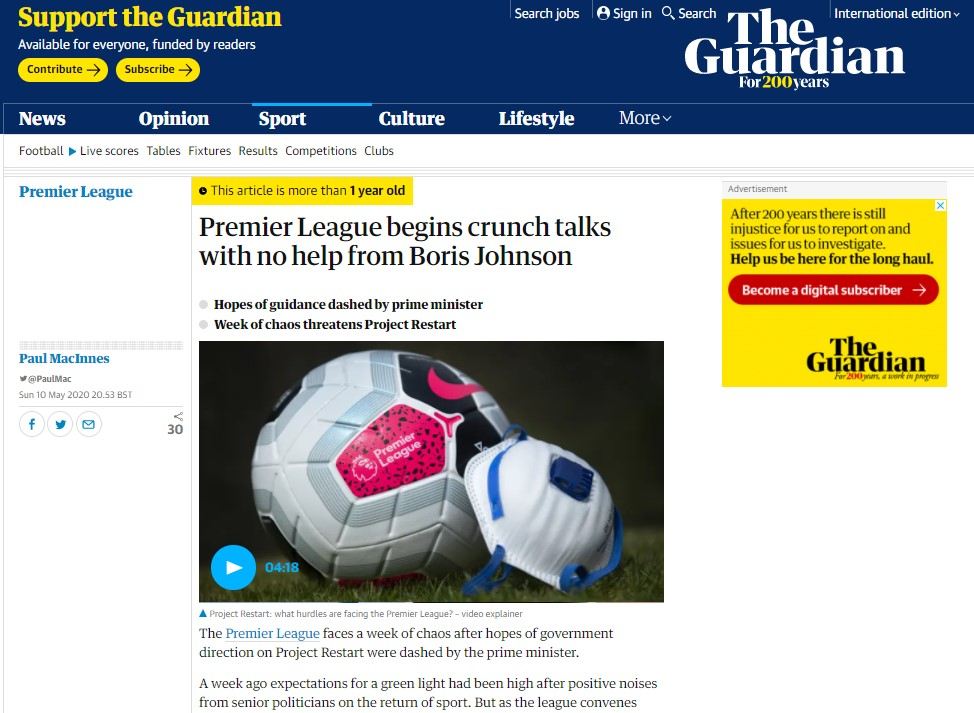

In [ ]:
from IPython.display import Image
Image(f"{path}/{my_folder}/TheGuardian.jpg")

### Reasons Why I Chose the Web Site

평소에 축구에 관심이 많던 저는, 제가 응원하는 팀이 얼만큼 자주 기사에서 언급이 되는지, 또 다른 팀에 비해선 몇배의 언급이 되는지에 대해서 궁금했었습니다. 이에 이번 기회를 통해 그 빈도와 차이를 "정량적"으로 분석해 보고 싶었습니다.

### Total Number of Web Articles Collected

6,178 건

### Data Time Range

2020-05-07 ~ 2021-05-10 약 1년

### Key Findings and Lessons

- 기사에서 언급된 순위는 "성적", "구단가치"와 정비례 하지 않음
- 오히려, "인지도"와는 상관관계가 크게 있음
- 영국 신문이기에 영국 클럽팀이 상대적으로 더 자주 등장함

### Major Challenges


- 클럽 이름, 선수 이름이 "Manchester United", "Lionel Messi"와 같이 Bigram으로 이루어져 있어 Unigram Analysis에서는 유의미한 Data를 가져오기 어려웠음
- 특히 game, refree, goal 등 관점에 따라 유의미, 무의미한 stopword들이 다수 등장 했음
- soccer section의 기사들만 발췌 하다보니 cluster분석을 했을 때 유의미한 결과를 얻기 힘들었음

### Future Work


- The guardian은 축구 주제 이외의 기사들도 비슷한 구조를 갖고있기 때문에 간단한 수정으로 영국정치, 영국 사회, 나아가 영국의 관점에서 바라본 세계의 이슈들 등 다양한 주제로 확장을 해볼 수 있을것으로 보임
- 영국 언론사 이다보니 기사가 다소 영국의 소식들에 집중되어있는 경향이 있어 스페인, 독일, 프랑스 등 다양한 나라의 기사들도 함께 분석하는것이 객관석을 갖는데에 도움이 될 것으로 보임


## Installing Necessary Packages

In [ ]:
! pip install --user nltk scikit-learn pyldavis textblob

     |████████████████████████████████| 1.7MB 25.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 37.0MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=d4ee3f5279bb31c569612fba8d05b72826f9e3611e0700a1cd9930bcdd5965ac
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.


## Loading Data

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{outcome_folder}/PJ_metadata_7980.csv", sep="\t")
df=df.dropna() #remove NaN
df=df.reset_index(drop=True)
df.inside = df.inside.astype(str)

df.tail(10)

,title,author,date,inside
6168,Premier League clubs to debate whether to dump VAR for rest of season,David Hytner,Fri 8 May 2020 12.40 EDT,Premier League clubs will debate whether to dump VAR for the remainder of the season – if it can be completed – after the International Football A...
6169,UNKNOWN,Justin McCurry,Fri 8 May 2020 12.06 EDT,So football is back. Jeonbuk Motors and Suwon Bluewings opened the coronavirus-delayed K-League season in an empty stadium in the south-west city ...
6170,Ole Gunnar Solskjær says Manchester United will not force players to return,Jamie Jackson,Fri 8 May 2020 10.50 EDT,Ole Gunnar Solskjær says he would not force any Manchester United footballer to play if they did not feel “mentally ready” due to concerns about c...
6171,"SPFL directors hit back at Rangers, Hearts face drop with restructure off",Ewan Murray,Fri 8 May 2020 10.26 EDT,Directors of the Scottish Professional Football League have snapped back at allegations raised in a dossier issued by Rangers and urged clubs not ...
6172,UNKNOWN,Suzanne Wrack,Fri 8 May 2020 07.00 EDT,"It seems a little odd pitching a game I’ve not seen for this series. I wasn’t at Wembley, I didn’t watch on TV and I didn’t listen to it on the ra..."
6173,Kyle Walker hits back at 'harassment' after breaching Covid-19 lockdown,Jamie Jackson,Fri 8 May 2020 06.15 EDT,"Kyle Walker believes he is being harassed by the media after contravening lockdown rules again when visiting his parents and sister, with Manchest..."
6174,"Neutral venue plan has 'no rationale', says former football police commander",David Conn,Fri 8 May 2020 05.04 EDT,Police advice that Premier League clubs must play at neutral venues if they resume the season has “no rationale” and risks demonising supporters b...
6175,UNKNOWN,Richard Jolly,Fri 8 May 2020 03.00 EDT,"The anniversary falls on Friday. In the second extraordinary semi-final comeback in as many days, Tottenham overcame Ajax courtesy of a 96th-minut..."
6176,Korea in world football spotlight as K-League begins after Covid-19 shutdown,Guardian sport,Thu 7 May 2020 22.24 EDT,"The eyes of the football world will be on the Jeonju World Cup Stadium in Korea on Friday night, when the K-League becomes the first major competi..."
6177,Rangers claim SPFL tried to 'influence' Uefa into allowing early end to season,Ewan Murray,Thu 7 May 2020 17.38 EDT,"A letter from the chief executives of the Scottish Professional Football League and Scottish Football Association to Uefa, claiming majority club ..."


## Popular Keywords Ranking

In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])
from nltk.util import ngrams
from textblob import TextBlob
df["sentences"] = df.inside.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))
df["words"] = df.inside.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
df["bigrams"] = df.words.apply(lambda x: [" ".join(gram) for gram in ngrams(x, 2)])
df["polarity"] = df.inside.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.inside.apply(lambda x: TextBlob(x).sentiment.subjectivity)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,title,author,date,inside,sentences,num_sentences,words,num_words,tagged_words,nouns,bigrams,polarity,subjectivity
0,Solskjær says youngsters in contention as Manchester United fixtures pile up,Aaron Bower,Mon 10 May 2021 08.30 EDT,Ole Gunnar Solskjær insists he will not risk the welfare of his Manchester United players as they prepare for the second of three Premier League f...,[Ole Gunnar Solskjær insists he will not risk the welfare of his Manchester United players as they prepare for the second of three Premier League ...,14,"[Ole, Gunnar, Solskjær, insists, he, will, not, risk, the, welfare, of, his, Manchester, United, players, as, they, prepare, for, the, second, of,...",507,"[(Ole, NNP), (Gunnar, NNP), (Solskjær, NNP), (insists, VBZ), (he, PRP), (will, MD), (not, RB), (risk, VB), (the, DT), (welfare, NN), (of, IN), (hi...","[Ole, Gunnar, Solskjær, welfare, Manchester, United, players, second, Premier, League, fixtures, days, players, Shola, Shoretire, Amad, Diallo, re...","[Ole Gunnar, Gunnar Solskjær, Solskjær insists, insists he, he will, will not, not risk, risk the, the welfare, welfare of, of his, his Manchester...",0.160761,0.423238
1,UNKNOWN,Andy Brassell,Mon 10 May 2021 08.15 EDT,"Bayern Munich have found a variety of different ways to become Bundesliga champions since 2013. This title, their ninth in a row, was sealed as th...","[Bayern Munich have found a variety of different ways to become Bundesliga champions since 2013., This title, their ninth in a row, was sealed as ...",28,"[Bayern, Munich, have, found, a, variety, of, different, ways, to, become, Bundesliga, champions, since, 2013, ., This, title, ,, their, ninth, in...",1328,"[(Bayern, NNP), (Munich, NNP), (have, VBP), (found, VBN), (a, DT), (variety, NN), (of, IN), (different, JJ), (ways, NNS), (to, TO), (become, VB), ...","[Bayern, Munich, variety, ways, Bundesliga, champions, title, row, team, Allianz, Arena, ’, home, dressing, room, Saturday, kick-off, Borussia, Mö...","[Bayern Munich, Munich have, have found, found a, a variety, variety of, of different, different ways, ways to, to become, become Bundesliga, Bund...",0.156670,0.476853
2,UNKNOWN,UNKNOWN,Mon 10 May 2021 08.01 EDT,PSG have won the title in seven of the last eight seasons in Ligue 1. Even though Juventus won nine Serie A titles in a row and Bayern Munich equa...,"[PSG have won the title in seven of the last eight seasons in Ligue 1., Even though Juventus won nine Serie A titles in a row and Bayern Munich eq...",49,"[PSG, have, won, the, title, in, seven, of, the, last, eight, seasons, in, Ligue, 1, ., Even, though, Juventus, won, nine, Serie, A, titles, in, a...",1404,"[(PSG, NNS), (have, VBP), (won, VBN), (the, DT), (title, NN), (in, IN), (seven, CD), (of, IN), (the, DT), (last, JJ), (eight, CD), (seasons, NNS),...","[PSG, title, seasons, Ligue, Juventus, Serie, A, titles, row, Bayern, Munich, Germany, French, football, clubs, title, QSI, ’, billions, charge, l...","[PSG have, have won, won the, the title, title in, in seven, seven of, of the, the last, last eight, eight seasons, seasons in, in Ligue, Ligue 1,...",0.124199,0.430339
3,UNKNOWN,Nicky Bandini,Mon 10 May 2021 07.32 EDT,"If a single image could capture how far Juventus’s sights have fallen in this catastrophic campaign, it might be the anguish on Paulo Dybala’s fac...","[If a single image could capture how far Juventus’s sights have fallen in this catastrophic campaign, it might be the anguish on Paulo Dybala’s fa...",42,"[If, a, single, image, could, capture, how, far, Juventus, ’, s, sights, have, fallen, in, this, catastrophic, campaign, ,, it, might, be, the, an...",1261,"[(If, IN), (a, DT), (single, JJ), (image, NN), (could, MD), (capture, VB), (how, WRB), (far, RB), (Juventus, NNP), (’, NNP), (s, NN), (sights, NNS...","[image, Juventus, ’, s, sights, campaign, Paulo, Dybala, ’, face, end, defeat, Milan, seconds, Allianz, Stadium, team, chance, result, game, Dybal...","[If a, a single, single image, image could, coul

### Overall Popular Keywords (Unigram)

In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:

                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

In [ ]:
import string
local_stopwords = [c for c in string.punctuation] +\
                  ['’', '”', '“', '–', 'one', 'first', 'season', 'game'] +\
                  ['time', 'players', 'team', 'club', 'football', 'side', 'way'] +\
                  ['half', 'last', 'years', 'even', 'month', 'like','minutes']
global_stopwords = nltk.corpus.stopwords.words("english") 

In [ ]:
local_stopwords_forelse = [c for c in string.punctuation] +\
                  ['’', '”', '“', '–']

In [ ]:
unigram_counter = get_counter(df, global_stopwords+local_stopwords, "NN")
unigram_counter.most_common(100)

[('league', 4885),
 ('manager', 3110),
 ('premier', 2916),
 ('games', 2849),
 ('manchester', 2649),
 ('goal', 2555),
 ('player', 2532),
 ('home', 2500),
 ('city', 2377),
 ('united', 2355),
 ('champions', 2204),
 ('cup', 2186),
 ('goals', 2178),
 ('end', 2084),
 ('year', 2010),
 ('ball', 1938),
 ('week', 1922),
 ('win', 1907),
 ('world', 1901),
 ('england', 1862),
 ('day', 1832),
 ('place', 1791),
 ('match', 1743),
 ('fans', 1722),
 ('clubs', 1709),
 ('people', 1695),
 ('liverpool', 1692),
 ('points', 1677),
 ('point', 1666),
 ('something', 1622),
 ('chelsea', 1616),
 ('part', 1590),
 ('matches', 1582),
 ('teams', 1574),
 ('defeat', 1516),
 ('things', 1502),
 ('chance', 1488),
 ('days', 1454),
 ('lot', 1453),
 ('squad', 1447),
 ('arsenal', 1444),
 ('times', 1436),
 ('start', 1429),
 ('victory', 1422),
 ('sunday', 1407),
 ('moment', 1364),
 ('summer', 1329),
 ('thing', 1301),
 ('pitch', 1293),
 ('west', 1289),
 ('months', 1278),
 ('striker', 1268),
 ('midfielder', 1251),
 ('penalty', 122

전체 워드들을 대상으로 한 키워드 랭킹은 stopword로서 제외하기에 애매한 키워드들이 다수 포함된 관계로 특별히 인상 깊지는 않았음. 본문 보다는 제목을 대상으로 한 키워드 분석이 오히려 유의미한 결과를 보여줄 수 있지 않을까 생각됨.

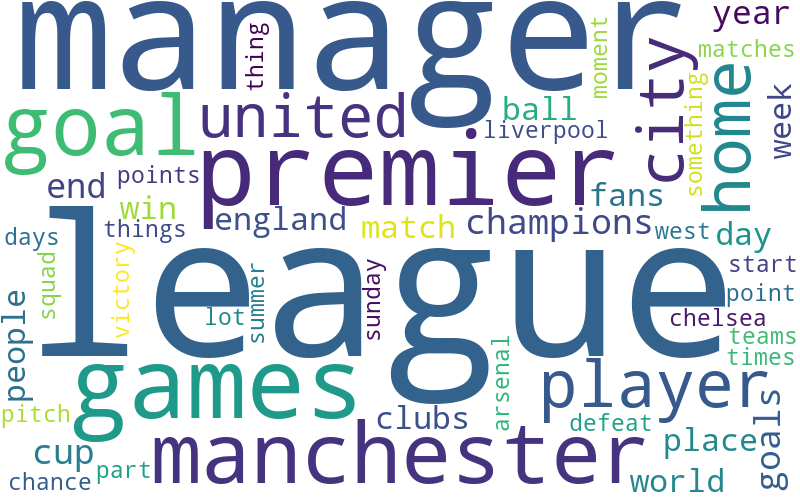

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(unigram_counter, f"{outcome_folder}/PJ_uni_wordcloud.png", 50)

### Overall Popular Keywords (Bigram)

In [ ]:
def get_bigram_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.bigrams:
        word_set = set()

        for t in l:
            word = t.lower()
            w1 = word.split(' ')[0]
            w2 = word.split(' ')[1]

            if (w1 in stopwords) or (w2 in stopwords):
                continue

            word_set.add(word)

        counter.update(word_set)
        
    return counter

In [ ]:
global_stopwords = nltk.corpus.stopwords.words("english") 
bigram_counter = get_bigram_counter(df, global_stopwords+local_stopwords)
bigram_counter.most_common(50)

[('premier league', 2715),
 ('manchester united', 1640),
 ('manchester city', 1639),
 ('champions league', 1628),
 ('world cup', 887),
 ('west ham', 807),
 ('fa cup', 791),
 ('real madrid', 678),
 ('aston villa', 676),
 ('europa league', 640),
 ('pep guardiola', 555),
 ('josé mourinho', 539),
 ('jürgen klopp', 531),
 ('bayern munich', 524),
 ('sheffield united', 509),
 ('crystal palace', 485),
 ('west brom', 476),
 ('league games', 474),
 ('gunnar solskjær', 458),
 ('cup final', 449),
 ('super league', 448),
 ('ole gunnar', 431),
 ('mikel arteta', 411),
 ('social media', 385),
 ('frank lampard', 369),
 ('old trafford', 364),
 ('chief executive', 350),
 ('atlético madrid', 349),
 ('two goals', 345),
 ('top flight', 337),
 ('sky sports', 337),
 ('three points', 333),
 ('la liga', 332),
 ('borussia dortmund', 325),
 ('paris saint-germain', 322),
 ('manager said', 316),
 ('little bit', 304),
 ('marcus rashford', 303),
 ('two games', 298),
 ('harry kane', 294),
 ('rb leipzig', 292),
 ('gare

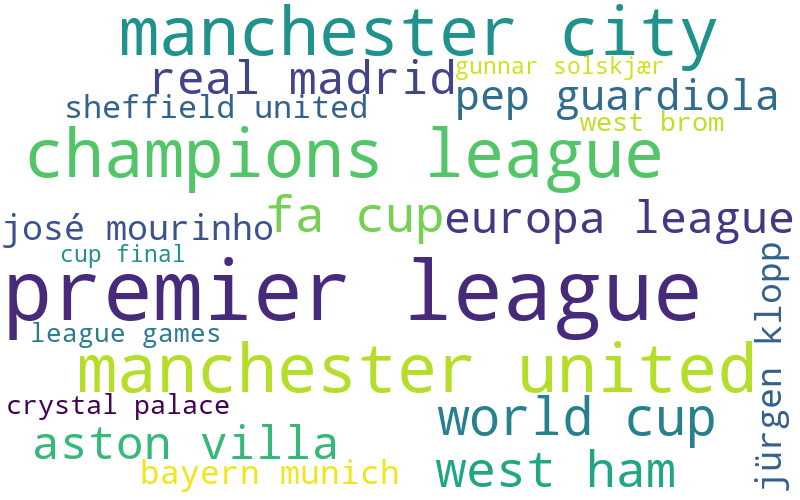

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(bigram_counter, f"{outcome_folder}/PJ_bi_wordcloud.png", 20)

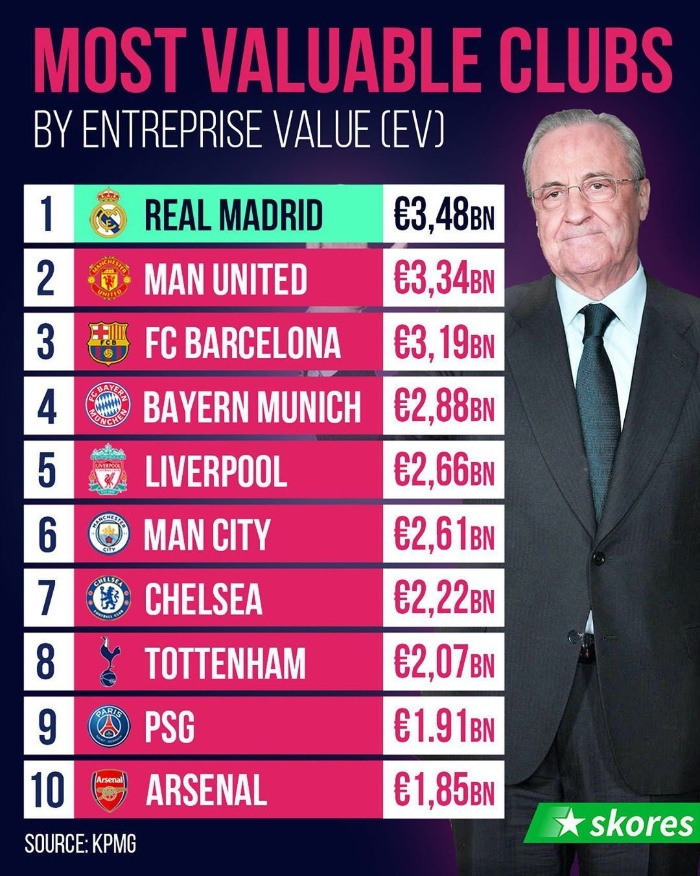

In [ ]:
Image(f"{path}/{my_folder}/mostvaluableclub2020.jpg")

### Popular Adjectives Representing Emotional Aspects

In [ ]:
counter_adjs = get_counter(df, global_stopwords+local_stopwords_forelse, "JJ")
counter_adjs.most_common(50)

[('last', 3890),
 ('first', 3869),
 ('second', 2524),
 ('good', 2436),
 ('next', 2294),
 ('new', 2209),
 ('best', 2152),
 ('final', 2057),
 ('many', 1975),
 ('top', 1908),
 ('much', 1718),
 ('former', 1650),
 ('little', 1613),
 ('big', 1551),
 ('great', 1354),
 ('clear', 1346),
 ('right', 1295),
 ('different', 1263),
 ('international', 1257),
 ('least', 1223),
 ('better', 1219),
 ('able', 1192),
 ('important', 1191),
 ('third', 1189),
 ('past', 1181),
 ('long', 1168),
 ('early', 1156),
 ('difficult', 1121),
 ('european', 1108),
 ('late', 1021),
 ('real', 1020),
 ('recent', 1002),
 ('hard', 998),
 ('young', 976),
 ('full', 972),
 ('high', 880),
 ('possible', 844),
 ('positive', 836),
 ('happy', 789),
 ('due', 760),
 ('sure', 744),
 ('fourth', 734),
 ('old', 718),
 ('strong', 708),
 ('previous', 695),
 ('likely', 694),
 ('2-0', 667),
 ('wide', 658),
 ('close', 656),
 ('biggest', 655)]

형용사들만을 대상으로 한 키워드 분석에서는 축구 기사 특성상 first, second등이 자주 등장 하였음.(first half, second half)

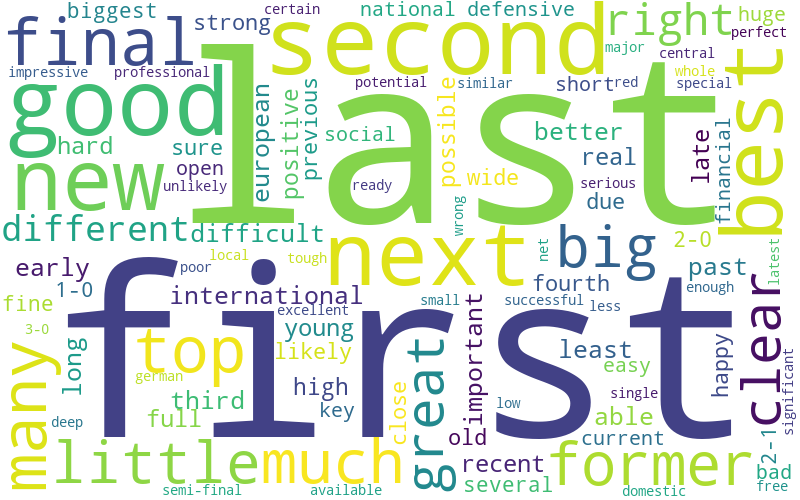

In [ ]:
draw_wordcloud(counter_adjs, f"{outcome_folder}/week6_wordcloud_adjs.png", 100)

### Popular Verbs Representing Behavioral Aspects

In [ ]:
counter_verbs = get_counter(df, global_stopwords+local_stopwords_forelse, "VB")
counter_verbs.most_common(50)

[('said', 4168),
 ('made', 3060),
 ('get', 2455),
 ('play', 2413),
 ('make', 2410),
 ('played', 2358),
 ('going', 2292),
 ('take', 2262),
 ('go', 2147),
 ('see', 2047),
 ('came', 1975),
 ('got', 1917),
 ('come', 1879),
 ('want', 1815),
 ('scored', 1807),
 ('left', 1805),
 ('put', 1800),
 ('know', 1789),
 ('think', 1759),
 ('took', 1686),
 ('win', 1681),
 ('playing', 1666),
 ('given', 1658),
 ('need', 1545),
 ('went', 1485),
 ('lost', 1399),
 ('say', 1375),
 ('set', 1366),
 ('done', 1298),
 ('following', 1285),
 ('look', 1230),
 ('give', 1212),
 ('keep', 1193),
 ('looked', 1179),
 ('started', 1179),
 ('found', 1157),
 ('told', 1148),
 ('taken', 1138),
 ('winning', 1113),
 ('find', 1110),
 ('become', 1087),
 ('feel', 1083),
 ('making', 1083),
 ('says', 1079),
 ('felt', 1078),
 ('taking', 1075),
 ('including', 1072),
 ('seen', 1051),
 ('coming', 1028),
 ('looking', 1005)]

동사로 한정지은 키워드 분석에서는 play, get, win 등 승부와 관련된 표현들이 자주 등장하였음.

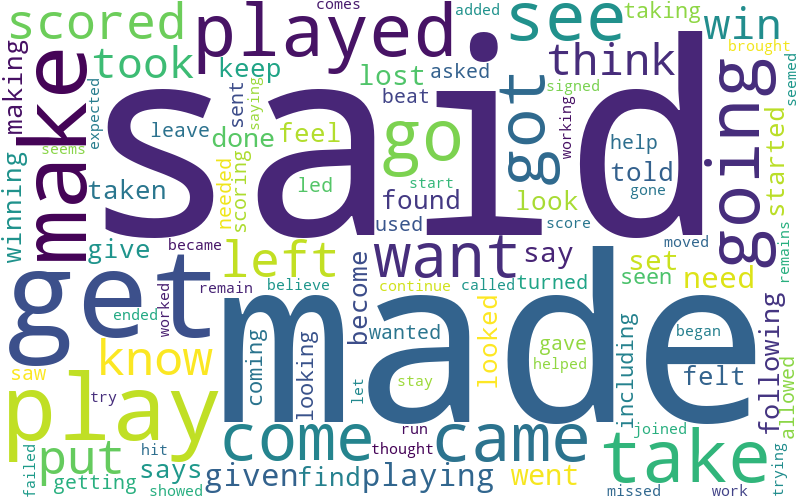

In [ ]:
draw_wordcloud(counter_verbs, f"{outcome_folder}/week6_wordcloud_verbs.png", 100)

## Time Series Analysis

수집된 웹 페이지들이 게재된 기간은 2020년 5월 7일부터 2021년 5월 10일로서 약 1년의 time range를 가짐. 

In [ ]:
df_temp=df[df.date != "UNKNOWN"]
df_temp.date=df_temp.date.apply(lambda x: x.split(" ")[3]+" " +x.split(" ")[2]+" "+x.split(" ")[1])
df_temp.date=pd.to_datetime(df_temp.date)
df_temp.date

/root/.local/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0      2021-05-10
1      2021-05-10
2      2021-05-10
3      2021-05-10
4      2021-05-10
          ...    
6173   2020-05-08
6174   2020-05-08
6175   2020-05-08
6176   2020-05-07
6177   2020-05-07
Name: date, Length: 5895, dtype: datetime64[ns]

In [ ]:
import numpy as np

count = pd.Series(data=1, index=df_temp.date).resample(rule="w").count()
count

date
2020-05-10     31
2020-05-17     88
2020-05-24     86
2020-05-31    101
2020-06-07     87
2020-06-14     93
2020-06-21    129
2020-06-28    129
2020-07-05    122
2020-07-12    112
2020-07-19    114
2020-07-26    116
2020-08-02    101
2020-08-09    107
2020-08-16    109
2020-08-23     85
2020-08-30     89
2020-09-06     99
2020-09-13    117
2020-09-20    110
2020-09-27    114
2020-10-04    118
2020-10-11     90
2020-10-18    104
2020-10-25    113
2020-11-01    102
2020-11-08    103
2020-11-15    100
2020-11-22    116
2020-11-29    131
2020-12-06    114
2020-12-13    121
2020-12-20    110
2020-12-27     91
2021-01-03    105
2021-01-10    105
2021-01-17    116
2021-01-24    121
2021-01-31    127
2021-02-07    116
2021-02-14    123
2021-02-21    119
2021-02-28    122
2021-03-07    134
2021-03-14    135
2021-03-21    115
2021-03-28    111
2021-04-04    120
2021-04-11    119
2021-04-18    133
2021-04-25    161
2021-05-02    127
2021-05-09    126
2021-05-16      8
Freq: W-SUN, dtype: int

In [ ]:
count.mean(), count.std()

(109.16666666666667, 23.20438312531525)

주별 게재 건수의 평균은 약 109건, 표준편차는 약 23건으로서, 매주 평균 109건 정도가 게재되었음. 

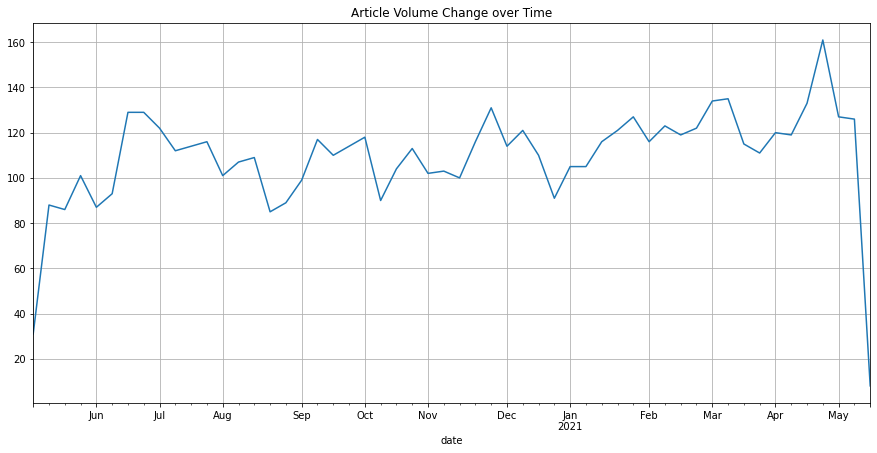

In [ ]:
count.plot(kind="line", title="Article Volume Change over Time", figsize=(15,7), grid=True)

### Peak Day Analysis

In [ ]:
count.max(), count.idxmax()

(161, Timestamp('2021-04-25 00:00:00', freq='W-SUN'))

**가장 많이 게재된 peak week는 2021년 4월 25일 주간으로서, 최근 엄청난 논란이 됐던 Super League 창설 발표일인 2021년 4월 19일부터 여러 이유들로 인해 무산되기까지의 1주일의 기간이 포함됨**



In [ ]:
df_temp[(df_temp.date == "2021-04-25")][["title", "inside"]].sample(10, random_state=0)

,title,inside
277,Boris Johnson urged to reveal if he endorsed Super League plans,Boris Johnson has been urged to reveal whether he signalled his endorsement of the European Super League (ESL) when he met the chief executive of ...
282,Women’s Champions League: Glas gives Bayern first-leg edge over Chelsea,Chelsea’s defensive fragility was brutally exposed as they lost 2-1 against Bayern Munich in the first leg of their Champions League semi-final.De...
284,Manchester City win fourth Carabao Cup in a row as Laporte sinks Spurs,Perhaps Pep Guardiola ought to keep the trophy. His owners at Manchester City do not seem too bothered about the Carabao Cup; they would happily d...
285,UNKNOWN,"David Conn’s five reforms to save football are all logical and sound (Sport, 22 April). But the fact remains that fans and broadcasters relish the..."
291,UNKNOWN,"The last time I was down in the catacombs of Borussia Dortmund’s stadium for post-match quotes, there was an eerie silence drowning out the chatte..."
280,Guardiola urges Manchester City to win ‘most important title’ after cup glory,Pep Guardiola urged his Manchester City side to channel the momentum from their Carabao Cup final win against Tottenham and seal “the most importa...
278,Rangers’ double dream over after St Johnstone win penalty shootout,Zander Clark was a hero in both boxes for St Johnstone as Callum Davidson’s team wrecked Rangers’ double dream with a thrilling penalty shootout v...
289,Swansea earn draw at Reading to seal place in Championship play-offs,"Swansea fought back from a goal down to draw 2-2 at Reading, a result that confirms the four teams who will contest the Championship play-offs.Sec..."
286,Maguire takes out frustration on Fred in Manchester United’s draw at Leeds,"Manchester United are now 12 points ahead of West Ham in fifth place with only 15 left to play for, so a Champions League berth is near to being s..."
283,UNKNOWN,Macarthur FC’s equaliser against Melbourne City on Saturday illustrated perfectly this madcap and endlessly entertaining A-League season. The ball...


In [ ]:
counter_peak = get_bigram_counter(df_temp[(df_temp.date == "2021-04-25")], global_stopwords+local_stopwords_forelse)
counter_peak.most_common(10)

[('premier league', 7),
 ('champions league', 6),
 ('super league', 6),
 ('second half', 5),
 ('first half', 5),
 ('manchester city', 5),
 ('european super', 4),
 ('manchester united', 4),
 ('pep guardiola', 4),
 ('first leg', 4)]

실제로 이 기간 동안 게재된 글들의 샘플과 키워드 랭킹을 살펴보면 모두 super league와 직/간접적으로 관련이 있는 키워드임을 알 수 있음

## Document Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words=global_stopwords+local_stopwords_forelse, max_df=0.7)
X = vectorizer.fit_transform(df.inside)

In [ ]:
X.shape

(6178, 56193)

There are 6,178 documents and 56,193 words, or features. 

### K-Means Clustering

### Step 1. Choose the number of clusters

In [ ]:
k = 4 #5로 했을 때 하위 2개와의 차이가 매우 컸음

### Step 2. Initialize a model object for k-means clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 3. Fit the model using the input data

In [ ]:
%time kmeans.fit(X)

CPU times: user 8min 10s, sys: 35.4 s, total: 8min 45s
Wall time: 8min 6s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 3, 1, 1], dtype=int32)

In [ ]:
df["cluster"] = kmeans.labels_

In [ ]:
df[["title", "inside", "cluster"]]

,title,inside,cluster
0,Solskjær says youngsters in contention as Manchester United fixtures pile up,Ole Gunnar Solskjær insists he will not risk the welfare of his Manchester United players as they prepare for the second of three Premier League f...,3
1,UNKNOWN,"Bayern Munich have found a variety of different ways to become Bundesliga champions since 2013. This title, their ninth in a row, was sealed as th...",3
2,UNKNOWN,PSG have won the title in seven of the last eight seasons in Ligue 1. Even though Juventus won nine Serie A titles in a row and Bayern Munich equa...,3
3,UNKNOWN,"If a single image could capture how far Juventus’s sights have fallen in this catastrophic campaign, it might be the anguish on Paulo Dybala’s fac...",0
4,UNKNOWN,Ann-Katrin Berger 9 Her performances should see her considered one of the world’s best goalkeepers. The 30-year-old won the golden glove with 12 c...,3
...,...,...,...
6173,Kyle Walker hits back at 'harassment' after breaching Covid-19 lockdown,"Kyle Walker believes he is being harassed by the media after contravening lockdown rules again when visiting his parents and sister, with Manchest...",1
6174,"Neutral venue plan has 'no rationale', says former football police commander",Police advice that Premier League clubs must play at neutral venues if they resume the season has “no rationale” and risks demonising supporters b...,1
6175,UNKNOWN,"The anniversary falls on Friday. In the second extraordinary semi-final comeback in as many days, Tottenham overcame Ajax courtesy of a 96th-minut...",3
6176,Korea in world football spotlight as K-League begins after Covid-19 shutdown,"The eyes of the football world will be on the Jeonju World Cup Stadium in Korea on Friday night, when the K-League becomes the first major competi...",1


In [ ]:
count2 = df.cluster.value_counts()
count2

3    2367
1    2176
0    1394
2     241
Name: cluster, dtype: int64

전체 문서들에 대해 다양한 개수의 클러스터를 찾아본 결과 4개의 클러스터를 찾았을 때 어느 한 클러스터에 큰 쏠림 없이 비교적 균형 있는 클러스터들을 구할 수 있었음.  

In [ ]:
df[df.cluster == count2.index[0]].sample(10, random_state=0)[["title", "inside", "cluster"]]     # the largest cluster

,title,inside,cluster
5694,UNKNOWN,"Jack Sullivan grins. After a long, impassioned monologue about the future of women’s football, the 20-year-old managing director of West Ham Women...",3
1290,Arsenal frustrated over Europa League trip to Greece days before facing Spurs,Mikel Arteta has reflected Arsenal’s frustration at a fixture switch that will leave them going into the north London derby on 14 March on the bac...,3
1228,Solskjær shrugs off calls to imitate Guardiola’s style at Manchester United,Ole Gunnar Solskjær has dismissed suggestions that Manchester United should imitate the tactical plan of Pep Guardiola’s free-scoring league leade...,3
3265,"Paul Pogba 'cannot be happy' at Manchester United, says Deschamps","Paul Pogba “cannot be happy” with the situation he finds himself in at Manchester United, the France manager, Didier Deschamps, has said.The midfi...",3
4632,UNKNOWN,Manchester United booked their place in the semi-finals the hard way and the task will only become more difficult from here. Their surprising fail...,3
2971,UNKNOWN,Crystal Palace have never won a match in the top flight when they have played on a Friday but have a great opportunity to bring an end to that sta...,3
4390,Everton hopeful of agreeing deal for James Rodríguez with Real Madrid,Everton remain hopeful of agreeing a deal to sign James Rodríguez as negotiations with Real Madrid over permanent transfer for the Colombia midfie...,3
1676,UNKNOWN,"Ah, the magic of the Cup! On Tuesday, in the first match of the fifth round, Burnley put in exactly the sort of performance you’d expect from an o...",3
2556,UNKNOWN,"For Kevin Kyle, the nadir came in his kitchen. The Scottish striker was boiling the water to prepare his baby’s bottle when it kicked out at the p...",3
5757,Liverpool and Georginio Wijnaldum hold positive talks over new contract,Liverpool are hopeful of agreeing a contract extension of at least three years with Georginio Wijnaldum after positive talks.The midfielder’s deal...,3


In [ ]:
counter_max = get_bigram_counter(df[df.cluster == count2.index[0]], global_stopwords+local_stopwords_forelse)
counter_max.most_common(30)

[('premier league', 1347),
 ('manchester city', 958),
 ('manchester united', 954),
 ('champions league', 908),
 ('last season', 658),
 ('west ham', 526),
 ('fa cup', 461),
 ('aston villa', 411),
 ('real madrid', 401),
 ('josé mourinho', 391),
 ('world cup', 382),
 ('pep guardiola', 375),
 ('jürgen klopp', 368),
 ('europa league', 360),
 ('first time', 341),
 ('gunnar solskjær', 328),
 ('bayern munich', 328),
 ('ole gunnar', 311),
 ('sheffield united', 307),
 ('crystal palace', 305),
 ('years ago', 301),
 ('last year', 297),
 ('west brom', 287),
 ('frank lampard', 285),
 ('last week', 279),
 ('league games', 277),
 ('next season', 273),
 ('mikel arteta', 270),
 ('old trafford', 247),
 ('two years', 244)]

첫번째 클러스터에선, 선수명, 클럽명이 직접적으로 등장한 횟수가 많음

In [ ]:
df[df.cluster == count2.index[1]].sample(10, random_state=0)[["title", "inside", "cluster"]]     # the second largest cluster

,title,inside,cluster
507,Unai Emery to face Arsenal reunion with Villarreal in Europa League semis,Unai Emery will face his former club Arsenal in the Europa League semi-finals after Villarreal defeated Dinamo Zagreb.Emery spent an underwhelming...,1
5216,David Dunn appointed as manager of Football League returnee Barrow,David Dunn has been appointed as the manager of Barrow as the club prepare for their return to the English Football League. The former Blackburn R...,1
1319,UNKNOWN,The US Soccer Federation is not what it thinks it is.The federation was queued up to give itself a pat on the back Saturday after its Annual Gener...,1
2603,UNKNOWN,"1) Tributes have been pouring in this week for Gérard Houllier, the former Liverpool, Lyon, Aston Villa and France manager who died on Monday aged...",1
4951,Premier League to start on 12 September but break for players remains an issue,The Premier League has confirmed the start date for next season but has yet to resolve when some of its players will get a break.The 2020-21 campa...,1
2832,UNKNOWN,"Arresting baddies on the Friday before a holiday Monday is a well-known police ploy. It is Easter weekend, 2004, and David Martindale must stare a...",1
1749,Merseyside and Manchester clubs issue joint statement condemning racism,"Manchester City, Manchester United, Liverpool and Everton have issued a joint statement to condemn the racism suffered by players, officials and s...",1
2198,Liverpool Women part company with manager Vicky Jepson,The growing insecurity of managing in the increasingly ruthless top tiers of women’s football was highlighted as Vicky Jepson left Liverpool by “m...,1
2940,UNKNOWN,Alun Armstrong thought he knew all about pressure. After converting a penalty against Internazionale at San Siro and playing Premier League footba...,1
5619,Lisbon confirmed as venue for Champions League mini-tournament,"The quarter-finals, semi-finals and final of the Champions League will be played as a single-match, straight knockout tournament between the eight...",1


In [ ]:
counter_max = get_bigram_counter(df[df.cluster == count2.index[1]], global_stopwords+local_stopwords_forelse)
counter_max.most_common(30)

[('premier league', 859),
 ('world cup', 415),
 ('manchester united', 407),
 ('manchester city', 387),
 ('champions league', 330),
 ('football association', 301),
 ('chief executive', 298),
 ('social media', 255),
 ('super league', 253),
 ('first time', 241),
 ('last year', 231),
 ('english football', 231),
 ('last week', 228),
 ('football league', 223),
 ('fa cup', 197),
 ('years ago', 188),
 ('league clubs', 164),
 ('governing body', 156),
 ('cup final', 152),
 ('last season', 152),
 ('two years', 151),
 ('league one', 148),
 ('national team', 148),
 ('last month', 147),
 ('behind closed', 140),
 ('aston villa', 137),
 ('league two', 133),
 ('football club', 131),
 ('take place', 129),
 ('real madrid', 127)]

두번째로 큰 클러스터는 league, cup 등 협회과 대회 자체에 대한 기사가 주를 이룸

In [ ]:
df[df.cluster == count2.index[-1]].sample(10, random_state=0)[["title", "inside", "cluster"]]     # the smallest cluster 

,title,inside,cluster
1761,Fulham v West Ham: match preview,Fulham are winless in their past 12 matches and that run feels likely to continue against a West Ham side pushing for European qualification. Jess...,2
1266,Aston Villa v Wolves: match preview,Wolves will be happy Jack Grealish is unavailable for Aston Villa for a fourth successive game. They are much less threatening without the playmak...,2
611,Sheffield United v Arsenal: match preview,Arsenal’s season may be alive in the Europa League but they share an empty feeling with Sheffield United that their league campaign has become mor...,2
1379,Leicester v Arsenal: match preview,Leicester have tended to recover well from the few disappointments they have suffered this season and will be hoping to put Thursday’s Europa Leag...,2
1760,Aston Villa v Arsenal: match preview,Mikel Arteta saw Arsenal’s seven-game unbeaten league run end in disastrous fashion at Molineux on Tuesday but would do well to remember just how ...,2
4091,Newcastle v Brighton: match preview,Newcastle have fared fairly badly against Brighton since the pair were promoted together in 2017. They have lost two and drawn four of their past ...,2
2819,West Brom v Crystal Palace: match preview,Wilfried Zaha’s return after testing positive for Covid-19 could be just the lift Crystal Palace need after two defeats without their talisman. We...,2
3864,Everton v Brighton: match preview,Everton have started wonderfully but injuries have hit Carlo Ancelotti’s side already. Midfielders Allan and André Gomes definitely miss out while...,2
2815,Sheffield United v Leicester: match preview,Sheffield United are still looking for their first win after 10 matches. Chris Wilder was honest about his side’s shortcoming after the defeat aga...,2
4205,Brighton v Chelsea: match preview,"Frank Lampard’s new-look Chelsea begin away at Brighton, with Timo Werner and Kai Havertz set to start following big-money moves, though the game ...",2


In [ ]:
counter_min = get_bigram_counter(df[df.cluster == count2.index[-1]], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('suspended nonediscipline', 235),
 ('sky sports', 170),
 ('sports premier', 160),
 ('premier leaguevenue', 160),
 ('cards/gameodds h', 136),
 ('match fitness', 122),
 ('bt sport', 56),
 ('sport 1venue', 49),
 ('manchester city', 43),
 ('premier league', 38),
 ('graham searlessunday', 37),
 ('8pm sky', 37),
 ('west brom', 36),
 ('nonesuspended nonediscipline', 35),
 ('manchester united', 34),
 ('graham searlessaturday', 34),
 ('aston villa', 33),
 ('sheffield united', 33),
 ('champions league', 31),
 ('west ham', 31),
 ('5.30pm sky', 31),
 ('n/aodds h', 30),
 ('crystal palace', 27),
 ('scorer salah', 26),
 ('4.30pm sky', 25),
 ('scorer maupay', 25),
 ('injured nonesuspended', 24),
 ('12.30pm bt', 24),
 ('scorer ings', 24),
 ('h evens', 23)]

세번쨰 클러스터는 기사들 중에서 승부를 예측하는 기사들로 이루어짐

## Topic Modeling

### Step 1. Choose the number of topics

In [ ]:
num_topics = 5

### Step 2. Initialize a model object for LDA topic modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [ ]:
%time lda.fit(X)

CPU times: user 15.4 s, sys: 57.2 ms, total: 15.5 s
Wall time: 15.5 s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Step 4. Examine the output of topic modeling

In [ ]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [ ]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
178.08 * said + 173.85 * season + 153.44 * club + 148.12 * players + 147.68 * football + 142.57 * game + 141.69 * united + 135.45 * team + 134.43 * city + 128.47 * back

*** Topic 1:
0.79 * spors + 0.73 * ricchio + 0.68 * mée + 0.66 * kallbäck + 0.65 * ngcongca + 0.58 * faubert + 0.58 * tilio + 0.53 * shu + 0.53 * csl + 0.50 * ruhs

*** Topic 2:
0.97 * damm + 0.72 * canà + 0.67 * cybersecurity + 0.61 * soto + 0.50 * ncsc + 0.49 * ledezma + 0.47 * gioacchini + 0.41 * nel + 0.41 * pallone + 0.36 * longobarda

*** Topic 3:
0.81 * adrijan + 0.52 * asterix + 0.50 * fioccola + 0.47 * antivirus + 0.47 * obelix + 0.46 * foakes + 0.37 * lomu + 0.37 * lelouch + 0.37 * catt + 0.35 * mountjoy

*** Topic 4:
1.42 * bennell + 0.87 * keogh + 0.85 * sandoy + 0.83 * mayorga + 0.81 * katai + 0.80 * thg + 0.80 * hummel + 0.79 * wisten + 0.76 * goths + 0.74 * kick4life



### Topic Model Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

PreparedData(topic_coordinates=              x             y  topics  cluster       Freq
topic                                                    
0      0.191908 -7.864356e-08       1        1  94.342315
4     -0.048103 -1.629794e-04       2        1   1.423162
2     -0.048002  8.117963e-05       3        1   1.417935
1     -0.047954  9.625335e-05       4        1   1.412108
3     -0.047848 -1.437490e-05       5        1   1.404481, topic_info=              Term      Freq     Total Category  logprob  loglift
6390       bennell  2.000000  2.000000  Default  30.0000  30.0000
55808     youngest  6.000000  6.000000  Default  29.0000  29.0000
47739        stick  6.000000  6.000000  Default  28.0000  28.0000
7245         bobby  6.000000  6.000000  Default  27.0000  27.0000
11628    condition  6.000000  6.000000  Default  26.0000  26.0000
...            ...       ...       ...      ...      ...      ...
17946  eviscerates  0.026848  0.282009   Topic5 -10.6661   1.9137
1879           919  0.026848  0.282009   Topic5 -10.6661   1.9137
9031         canet  0.030586  0.364503   Topic5 -10.5357   1.7875
31294       marion  0.029581  0.384776   Topic5 -10.5691   1.7000
21459       gilles  0.028575  0.394180   Topic5 -10.6037   1.6412

[197 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
4424       1  0.997082   arsenal
5225       1  1.002376      back
6390       1  0.889988   bennell
7245       1  0.941125     bobby
7265       1  0.940767    bodies
...      ...       ...       ...
54878      1  0.994186       win
55291      1  0.998371     would
55367      1  0.802759    writer
55688      1  1.001514      year
55808      1  0.932507  youngest

[62 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

한가지의 주제의 기사를 다루다 보니 Topic Modeling에서 큰 의미를 찾기 힘들었음.
num_topics를 다양화 하더라도 계속 1가지의 주제에 90%이상이 쏠리는 현상이 반복되었음.